In [ ]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import json 

#loading the data 

In [ ]:
with open('/content/sarcasm.json') as f:
  data = json.load(f)

## Seprating sentence and label

In [ ]:
sent=[]
label=[]
for item in data:
  sent.append(item['headline'])
  label.append(item['is_sarcastic'])

In [ ]:
len(sent)

26709

##Setting all hyperparameters

In [ ]:
max_len = 32
vocab_size = 10000
embedding_dim = 16 
training_size = 20000

## Splitting into train and test 

In [ ]:
train_sents = sent[:training_size]
train_labels = np.array(label[:training_size])
testing_sents = sent[training_size:]
testing_labels = np.array(label[training_size:] )

#Preprocessing 
## 1. Genereting tokens
## 2. Padding

In [ ]:
 tokenizer  = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

In [ ]:
tokenizer.fit_on_texts(train_sents)

In [ ]:
train_seq = tokenizer.texts_to_sequences(train_sents)
padded_train_seq = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')

In [ ]:
test_seq = tokenizer.texts_to_sequences(testing_sents)
padded_test_seq = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')

In [ ]:
word_index = tokenizer.word_index

#Model 

In [ ]:
model = keras.Sequential([
                          keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
                          keras.layers.Flatten(),
                          keras.layers.Dense(24, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x=padded_train_seq, y=train_labels, epochs=10, validation_data=(padded_test_seq, testing_labels))

Epoch 1/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4229 - accuracy: 0.7900 - val_loss: 0.3161 - val_accuracy: 0.8605
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1878 - accuracy: 0.9263 - val_loss: 0.3248 - val_accuracy: 0.8657
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0827 - accuracy: 0.9747 - val_loss: 0.3923 - val_accuracy: 0.8602
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0285 - accuracy: 0.9930 - val_loss: 0.4773 - val_accuracy: 0.8559
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0091 - accuracy: 0.9984 - val_loss: 0.5425 - val_accuracy: 0.8526
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.6111 - val_accuracy: 0.8508
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.6657 - val_accuracy: 0.8511
Epoch 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

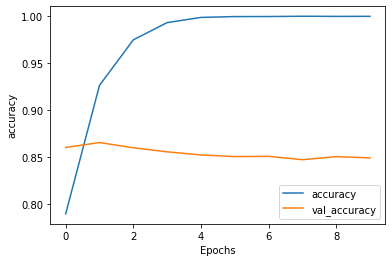

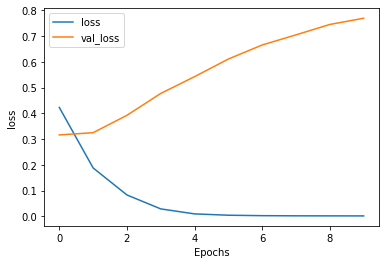

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')